In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('demanda-histrica.csv')

In [3]:
data.head()

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
0,2012,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2222.628,2012-01
1,2012,1,ACARQQ3Y,ASOC.COOP.ARG. - Quequén,GU,BUENOS AIRES,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,536.858,2012-01
2,2012,1,ACARSLSY,ASOC.COOP.ARG. - San Lorenzo,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,336.297,2012-01
3,2012,1,ACINROSY,ACINDAR ROSARIO EX-NAVARRO,GU,LITORAL,SANTA FE,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,601.066,2012-01
4,2012,1,ACINTBOY,ACINDAR PTA. TABLADA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3076.618,2012-01


In [167]:
data.tail()

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
122258,2020,2,YPF-TBCY,YPF S.A. - Edif. Torre Blanca,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,577.655,2020-02
122259,2020,2,YPFTORUZ,YPF EL TORDILLO,GU,PATAGONICA,CHUBUT,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3333.504,2020-02
122260,2020,2,YPFTREUA,YPF EL TREBOL CT MANANT. BEHR,AG,PATAGONICA,CHUBUT,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,4535.382,2020-02
122261,2020,2,YPF-VZMZ,YPF S.A-YAC.VIZCACHER.EX ASTRA,GU,CUYO,MENDOZA,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,25284.096,2020-02
122262,2020,2,ZUCARACY,ZUCAMOR SA PLANTA LA GAVIOTA,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,3235.086,2020-02


In [4]:
data.columns

Index(['anio', 'mes', 'agente_nemo', 'agente_descripcion', 'tipo_agente',
       'region', 'provincia', 'categoria_area', 'categoria_demanda', 'tarifa',
       'categoria_tarifa', 'demanda_MWh', 'indice_tiempo'],
      dtype='object')

In [5]:
data.shape

(122263, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122263 entries, 0 to 122262
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   anio                122263 non-null  int64  
 1   mes                 122263 non-null  int64  
 2   agente_nemo         122263 non-null  object 
 3   agente_descripcion  122263 non-null  object 
 4   tipo_agente         122263 non-null  object 
 5   region              122263 non-null  object 
 6   provincia           122263 non-null  object 
 7   categoria_area      122263 non-null  object 
 8   categoria_demanda   122263 non-null  object 
 9   tarifa              122263 non-null  object 
 10  categoria_tarifa    122263 non-null  object 
 11  demanda_MWh         122263 non-null  float64
 12  indice_tiempo       122263 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 12.1+ MB


In [7]:
data.describe()

,anio,mes,demanda_MWh
count,122263.000000,122263.000000,1.222630e+05
mean,2015.434776,6.373637,9.420555e+03
std,2.201872,3.469122,3.987174e+04
min,2012.000000,1.000000,-2.537772e+04
25%,2014.000000,3.000000,3.649625e+02
50%,2015.000000,6.000000,1.344686e+03
75%,2017.000000,9.000000,4.581487e+03
max,2020.000000,12.000000,1.572308e+06


In [15]:
data.describe(include=['O'])

,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,indice_tiempo
count,122263,122263,122263,122263,122263,122263,122263,122263,122263,122263
unique,591,610,4,9,22,11,2,37,4,98
top,CLUJAN1W,EMP DE ENERGIA DE RIO NEGRO SA,DI,BUENOS AIRES,BUENOS AIRES,Resto,Distribuidor,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2017-06
freq,1567,1096,79453,45915,68217,60570,73704,42810,59550,1586


In [27]:
data['demanda_MWh'].max()

1572308.055

In [39]:
data['demanda_MWh'].min()

-25377.715

In [46]:
condicion=data.demanda_MWh.isin([1572308.055,-25377.715])
data[condicion]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
68168,2016,4,DPCORRWD,DPE CORRIENTES,DI,NORESTE,CORRIENTES,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-25377.715,2016-04
116306,2019,7,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RESIDENCIAL,Residencial,1572308.055,2019-07


In [168]:
provincias_demanda=data['provincia'].value_counts(normalize=True)
data['provincia'].value_counts(normalize=True)

BUENOS AIRES      0.557953
CHUBUT            0.060517
SANTA FE          0.044347
MENDOZA           0.041722
ENTRE RIOS        0.034352
NEUQUEN           0.028291
RIO NEGRO         0.024284
SAN JUAN          0.022820
SANTA CRUZ        0.021666
CORDOBA           0.020988
TUCUMAN           0.018256
SAN LUIS          0.014551
LA RIOJA          0.012465
CORRIENTES        0.012244
FORMOSA           0.011704
MISIONES          0.011451
SALTA             0.011132
JUJUY             0.010935
SGO.DEL ESTERO    0.010829
CATAMARCA         0.010821
CHACO             0.010036
LA PAMPA          0.008637
Name: provincia, dtype: float64

In [119]:
region_demanda=data['region'].value_counts(normalize=True)
data['region'].value_counts(normalize=True)
region_demanda

BUENOS AIRES    0.375543
GRAN BS.AS.     0.182107
PATAGONICA      0.083059
LITORAL         0.078699
NOROESTE        0.074438
CUYO            0.064541
COMAHUE         0.060640
NORESTE         0.045435
CENTRO          0.035538
Name: region, dtype: float64

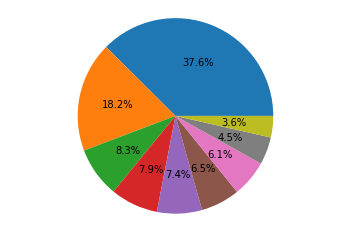

In [111]:
plt.pie(region_demanda,autopct="%0.1f%%")
plt.axis("equal")
plt.show()

In [145]:
val_max_2012=data[data.anio.isin([2012])].demanda_MWh.max()
val_min_2012=data[data.anio.isin([2012])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2012,val_min_2012])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
4100,2012,4,EDESASAD,EMP.DIST.ENERGIA DE SALTA,DI,NOROESTE,SALTA,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-363.831,2012-04
6331,2012,6,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RES. MENOR O IGUAL 1000 KWH BIM,Residencial,844351.215,2012-06


In [149]:
val_max_2013=data[data.anio.isin([2013])].demanda_MWh.max()
val_min_2013=data[data.anio.isin([2013])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2013])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
28444,2013,12,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RES. MENOR O IGUAL 1000 KWH BIM,Residencial,983326.506,2013-12


In [151]:
val_max_2014=data[data.anio.isin([2014])].demanda_MWh.max()
val_min_2014=data[data.anio.isin([2014])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2014])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
36973,2014,6,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RES. MENOR O IGUAL 1000 KWH BIM,Residencial,949827.703,2014-06


In [154]:
val_max_2015=data[data.anio.isin([2015])].demanda_MWh.max()
val_min_2015=data[data.anio.isin([2015])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2015])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
54083,2015,6,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RES. MENOR O IGUAL 1000 KWH BIM,Residencial,1006740.649,2015-06


In [155]:
val_max_2016=data[data.anio.isin([2016])].demanda_MWh.max()
val_min_2016=data[data.anio.isin([2016])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2016,val_min_2016])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
68168,2016,4,DPCORRWD,DPE CORRIENTES,DI,NORESTE,CORRIENTES,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-25377.715,2016-04
71065,2016,6,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RESIDENCIAL,Residencial,1028096.078,2016-06


In [156]:
val_max_2017=data[data.anio.isin([2017])].demanda_MWh.max()
val_min_2017=data[data.anio.isin([2017])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2017,val_min_2017])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
81297,2017,2,ESANJUJD,ENERGIA SAN JUAN SA EX-EDESSA,DI,CUYO,SAN JUAN,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-6554.332,2017-02
88769,2017,7,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RESIDENCIAL,Residencial,780499.483,2017-07


In [157]:
val_max_2018=data[data.anio.isin([2018])].demanda_MWh.max()
val_min_2018=data[data.anio.isin([2018])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2018,val_min_2018])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
104099,2018,7,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RESIDENCIAL,Residencial,1046149.598,2018-07
106565,2018,9,EDESALDD,EDESAL DISTRIBUIDOR,DI,CENTRO,SAN LUIS,Resto,Distribuidor,MERCADO TERMINO DISTRIB,Mercado a Término,-989.002,2018-09


In [159]:
val_max_2019=data[data.anio.isin([2019])].demanda_MWh.max()
val_min_2019=data[data.anio.isin([2019])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2019])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
116306,2019,7,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RESIDENCIAL,Residencial,1572308.055,2019-07


In [161]:
val_max_2020=data[data.anio.isin([2020])].demanda_MWh.max()
val_min_2020=data[data.anio.isin([2020])].demanda_MWh.min()
data[data.demanda_MWh.isin([val_max_2020])]

,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo
121088,2020,1,EDENOROD,EDENOR DISTRIBUIDOR,DI,GRAN BS.AS.,BUENOS AIRES,Edenor,Distribuidor,RESIDENCIAL,Residencial,1200124.891,2020-01


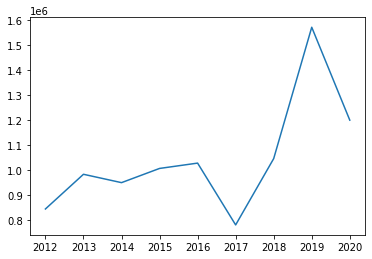

In [165]:
plt.plot([2012,2013,2014,2015,2016,2017,2018,2019,2020],[val_max_2012,val_max_2013,val_max_2014,val_max_2015,val_max_2016,val_max_2017,val_max_2018,val_max_2019,val_max_2020])